## PROJECT 9

I got the data for this project from
https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage

Counter-Strike: Global Offensive (CS:GO) is a first person shooter with a heavy reliance on strategy and teamplay. A single match of CS:GO consists of many rounds with the first team to 16 rounds won winning the entire match. Each match has two teams (5 players on each): The Terrorists (Ts) and the Counter-Terrorists (CTs), with the teams switching sides at the midpoint of a match, with Ts becoming CTs and vice versa. 

CTs play on the defensive side and will try to stop the Ts from planting at one of two bombsites on a map. The Ts play offensively and try to plant the bomb at a bombsite before the round timer is up. Once planted the roles kind of reverse, with Ts on the defense as CTs try to retake the site and defuse teh bomb. If the bomb goes off, Ts win the round. If the bomb is defused, CTs win the round. If Ts kill all of the CTs in a round, Ts win, and vice versa, with the only exception being if the CTs kill all of the Ts but don't defuse the bomb in time.

A major part of the game is the utilites that each side uses to try and stop the other. These utlities include:
- smoke grenades (create a cloud of smoke that blocks line of sight)
- flash grenades (blind enemy players that make direct eye contact with the grenade)
- HE (normal grenades) 
- decoy grendes (mimic sound of players shooting) 
- molatov and incindeary grenades (Both put a pool of fire on the ground for a limited time, with
  Ts getting molatovs and CTs incideary grenades)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# reading in the data that contains round summaries for each match
df_metadata = pd.read_csv("csgodata/esea_meta_demos.part1.csv")
df_metadata2 = pd.read_csv("csgodata/esea_meta_demos.part2.csv")

In [3]:
# combining the datasets into one large dataset
df_metadata = pd.concat([df_metadata, df_metadata2])

This dataframe provides summary data of each round in a match. When Looking at the data to see what could be interesting, the columns that stand out the most are the start and end_seconds, the winner_side, and obviously the file and map columns.

In [4]:
df_metadata

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950
161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


In [5]:
# These dataframes contain data that gives information on grenades used in each round for an entire match.
df_gnade = pd.read_csv("csgodata/esea_master_grenades_demos.part1.csv")
df_gnade2 = pd.read_csv("csgodata/esea_master_grenades_demos.part2.csv")

In [6]:
# Combining the dataframes into a single large dataframe
df_gnade = pd.concat([df_gnade, df_gnade2])

In [7]:
# get all of the unique matches
games = df_gnade["file"].unique()

With the star and end_seconds columns, I want to see what the average length of a round is.

In [8]:
# finding the five number summary of seconds per round
# not sure why the max is so high
df_metadata["round_seconds"] = df_metadata["end_seconds"] - df_metadata["start_seconds"]
df_metadata["round_seconds"].describe()

count    377589.000000
mean         87.567479
std          28.648080
min          29.731000
25%          67.539000
50%          83.904800
75%         103.231600
max        1719.741000
Name: round_seconds, dtype: float64

<AxesSubplot:>

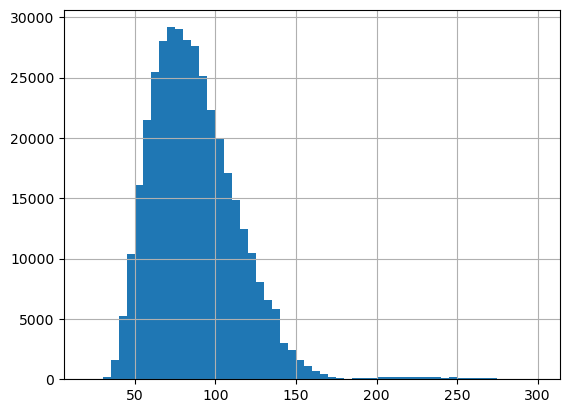

In [9]:
# I'm cutting the range at 300 becuase that's equal to 5 mins which is way over the
# amount of time that a round should be able to last. this only leaves out the extreme
# outliers which count for 0.045% of the data.
df_metadata["round_seconds"].hist(bins=56, range=[20,300])

In [10]:
# creating variable "rounds" which groups rounds by match to get the total number of 
# rounds in each match.
rounds = df_metadata.groupby("file").size()
rounds

file
esea_match_13770997.dem    24
esea_match_13779704.dem    39
esea_match_13779769.dem    22
esea_match_13779770.dem    27
esea_match_13779771.dem    27
                           ..
esea_match_13829155.dem    29
esea_match_13829165.dem    23
esea_match_13829169.dem    18
esea_match_13829171.dem    24
esea_match_13829173.dem    21
Length: 14921, dtype: int64

In [11]:
rounds.describe()

count    14921.000000
mean        25.308558
std          4.487482
min         15.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         62.000000
dtype: float64

Looking at the histogram below we can see that the number of rounds per match is close to 31 which makes sense as the win condition is normally first team to 16 rounds won or to a tie of 15-15. With a median of 25 rounds played in a match, we can infer that most matches are pretty close meaning the machmaking algorithm is doing a pretty good job at matching people with others of similar skill.

The odd games that go beyond 31 rounds are due to overtime rules which are used in pro matches. Overtime works by extending the match by 6 more rounds, with the team that wins the majority of those six winning the game. However, if both teams win 3 then another 6 rounds of overtime are given. Repeat until a team has won. The histogram after the 31 rounds shows the 6 round intervals that make up overtime. 

<AxesSubplot:>

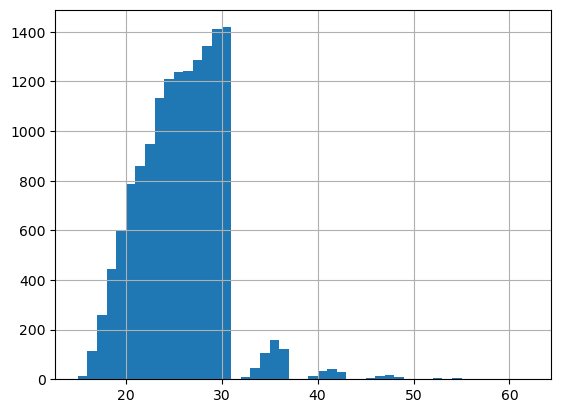

In [12]:
# histogram where each bin is a specific number of rounds per match
rounds.hist(bins=62 - 15, range=[15,62])

Next, I want to see which team, Ts or CTs, won the most matches in the dataset. I will group the wins by match and winner side which gives me the total number of rounds each side won per match.

In [13]:
round_wins = df_metadata.groupby(['file', 'winner_side']).size().reset_index(name='round_wins')

I need to determine who was the winner of the match by seeing who had more round wins. This can be difficult in a DataFrame, but I can group by every two rows and then get the index of which of those 2 rows had the maximum round_wins. I then store that row in a DataFrame.

In [14]:
winners = round_wins.loc[round_wins.groupby(round_wins.index//2).round_wins.idxmax(), :]

In [15]:
winners.describe()

,round_wins
count,14922.000000
mean,15.200844
std,3.721264
min,3.000000
25%,13.000000
50%,15.000000
75%,17.000000
max,39.000000


After analyzing the number of rounds that the winning team had to win the match there were some oddities. There were some teams that won with very few matches that didn't make sense in the context of competitive matches. After some debugging I noticed that the indexes of matches got shifted. I found there was one round where neither a T or CT won. To scrub the data I removed that one line, but then had to reindex the DataFrame.

In [16]:
round_wins[round_wins.groupby('file').file.transform('count') > 2]

,file,winner_side,round_wins
5350,esea_match_13783912.dem,CounterTerrorist,12
5351,esea_match_13783912.dem,None,1
5352,esea_match_13783912.dem,Terrorist,3


In [17]:
round_wins = round_wins[round_wins["winner_side"].str.contains("None") == False].reset_index()

In [18]:
winners = round_wins.loc[round_wins.groupby(round_wins.index//2).round_wins.idxmax(), :]

In [19]:
winners.describe()

,index,round_wins
count,14921.000000,14921.000000
mean,14921.327927,15.675759
std,8615.189498,3.268496
min,0.000000,8.000000
25%,7462.000000,13.000000
50%,14921.000000,15.000000
75%,22382.000000,17.000000
max,29842.000000,39.000000


Now this data looks better.

The above mean is 15.675759 rounds won. This makes sense as the normal amount of rounds won in a game is expected to be 16, however, some games tie, others end early due to a team surrendering, and some are games from a short competative mode which is first to nine wins. This last point also explains the min of 8 because a short competative match would tie at 8-8. 

In [20]:
# counts the number of matches won by terrorists and counter-terrorists.
winners["winner_side"].value_counts()

Terrorist           7569
CounterTerrorist    7352
Name: winner_side, dtype: int64

The Ts and CTs have roughly the same number of match wins, giving an indication that the game is balanced.

Finally, I wanted to see which map was played the most in the dataset.

The below shows that the most popular maps are de_mirage and de_cache, which to anyone who has played CS:GO should come as no surprise.

In [21]:
# counts the number of rounds played per map
df_metadata.groupby("map").size().sort_values(ascending=False)

map
de_mirage      132862
de_cache       128024
de_inferno      52876
de_overpass     23697
de_dust2        20225
de_train        12604
de_cbble         5792
de_nuke          1549
dtype: int64

From the start, my ultimate hope was that I could make a visualization that could plot where every smoke grenade landed in a match. The reason is because I'm not that good as CS:GO and I want to see where I should be throwing my smokes, but also because I think it would be really cool to look at, and see if just by looking at the plotted data conclusions could be drawn.

Luckily the last piece that I needed was provided with the rest of the data, that being the map_data which contains the in-game coordinates of each map and the x and y lengths of the map images.

In [22]:
# loading in map data
df_mapdata = pd.read_csv("csgodata/map_data.csv")

In [23]:
# rename column to easily get map names
df_mapdata.rename(columns = {"Unnamed: 0":"map"}, inplace = True)

In [24]:
df_mapdata

,map,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401
5,de_overpass,503,1740,1024,1024,-4820,-3591
6,de_train,2262,2447,1024,1024,-2436,-2469


I want to make a visualization that displays the positions of Attackers (those who threw the grenade), Victims (those who got damaged by the grenades), and where each grenade landed. 

To do this I used some functions to get the positions per type, then convert those positions to pixels, and finally a function that displays the information based on the match and round.

In [25]:
# This function takes a position column and a type column, and produces a dictionary of positions
# based on type.
def pos(df, pos_column, type_column):
    data = {}
    types = df[type_column].unique()
    for t in types:
        data[t] = df[df[type_column] == t][pos_column].values
    return data

In [26]:
# Takes position columns and adds new columns with the pixel calculation.
def pos2px(df, df_map, columns):
    # convert the map information into a dictionary for easier use
    mapinfo = df_map.iloc[0].to_dict()
    for column in columns:
        # assigns whether the position coordinate is x or y
        if '_x' in column:
            dir = 'X'
        elif '_y' in column:
            dir = 'Y'
        else: continue #ignore non-position columns
        
        # get the width of the map in game coordinates
        width = mapinfo['End'+dir]-mapinfo['Start'+dir]
        # calculate how far from the left side of the map the coordinate was
        df[column + '_offset'] = df[column] - mapinfo['Start'+dir]
        # find the percentage across the map the coordinate is and convert to the corresponding pixel
        df[column + '_px'] = (df[column + '_offset']/width)*mapinfo['Res'+dir]
        df[column + '_px'] = df[column + '_px'].apply(np.floor)
        # in-game coordinates increase upwards but the image-plot increases y downwards
        if '_y' in column:
            df[column + '_px'] = mapinfo['ResY'] - df[column + '_px']
    return df

In [27]:
# This is the main function that allows the ability to display multiple types of 
# information (people or grenades) and their position for any round of any match.
def displayGame(gameName, df, mapdata, gamesummary, round=0, show=[], filterout=[]):
    grenade_colors = {'Smoke': 'white',
                  'HE': 'lightgreen',
                  'Molotov': 'tomato',
                  'Flash': 'yellow',
                  'Incendiary': 'orange',
                  'Decoy': 'pink'}
    team_colors = {'Terrorist': 'red',
                   'CounterTerrorist': 'blue'}
    # filtering out data related to just this match
    gamedata = df[df['file'] == gameName]
    # data can be displayed for the entire match or a particular round
    if round > 0:
        gamedata = gamedata[gamedata['round'] == round]
    # get the map info for the map used in the match
    mapname = gamesummary[gamesummary['file'] == gameName]['map'].iloc[0]
    # plots the map
    im = plt.imread("csgodata/" + mapname + ".png")
    implot = plt.imshow(im)

    # place information in dataframes based on if you want to show 
    # a combination of attackers, victims, and/or grenades.
    nade_df = pd.DataFrame()
    att_df = pd.DataFrame()
    vic_df = pd.DataFrame()
    for l in show:
        # here the other functions are used to get grenade types and their pixel positions
        if l == 'nade_land':
            gamedata = gamedata[~gamedata['nade'].isin(filterout)] # only keep rows in the game that are not
                                                                   # in the filtered out list.
            nade_df = pos2px(gamedata.copy(), mapdata[mapdata['map'] == mapname], ['nade_land_x', 'nade_land_y'])
            nade_x_px = pos(nade_df, 'nade_land_x_px', 'nade')
            nade_y_px = pos(nade_df, 'nade_land_y_px', 'nade')
        # here the other functions are used to get attacker (CT or T) pixel positions
        elif l == 'att_pos':
            gamedata = gamedata[~gamedata['att_side'].isin(filterout)]
            att_df = pos2px(gamedata[gamedata['vic_side'].notna()].copy(), mapdata[mapdata['map'] == mapname], ['att_pos_x', 'att_pos_y'])
            att_x_px = pos(att_df, 'att_pos_x_px', 'att_side')
            att_y_px = pos(att_df, 'att_pos_y_px', 'att_side')
        # here the other functions are used to get victim (CT or T) pixel positions
        elif l == 'vic_pos':
            gamedata = gamedata[~gamedata['vic_side'].isin(filterout)]
            vic_df = pos2px(gamedata[gamedata['vic_side'].notna()].copy(), mapdata[mapdata['map'] == mapname], ['vic_pos_x', 'vic_pos_y'])
            vic_x_px = pos(vic_df, 'vic_pos_x_px', 'vic_side')
            vic_y_px = pos(vic_df, 'vic_pos_y_px', 'vic_side')
    # plots each type as a scatterplot on the image
    if not nade_df.empty:
        for t in nade_x_px.keys():
            plt.scatter(x=list(nade_x_px[t]), y=list(nade_y_px[t]), c=grenade_colors[t])
    if not att_df.empty:
        for t in att_x_px.keys():
            plt.scatter(x=list(att_x_px[t]), y=list(att_y_px[t]), c=team_colors[t], marker='^')
    if not vic_df.empty:
        for t in vic_x_px.keys():
            plt.scatter(x=list(vic_x_px[t]), y=list(vic_y_px[t]), c=team_colors[t], marker='x')
    plt.show()

Finally, I can create the visualization!

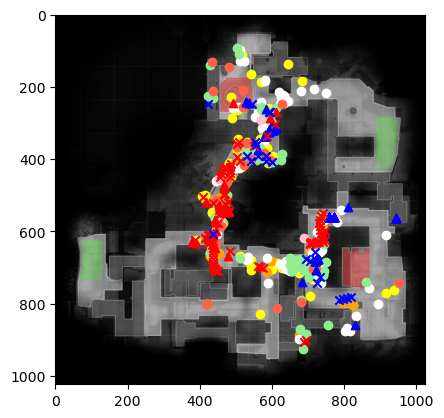

In [28]:
displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['vic_pos', 'att_pos', 'nade_land'])

WOW! this looks great, but since this shows all of the grenades, who did damage, and who took damage for the whole match it is a bit cluttered.

So now I wanna try to look at just a single round.

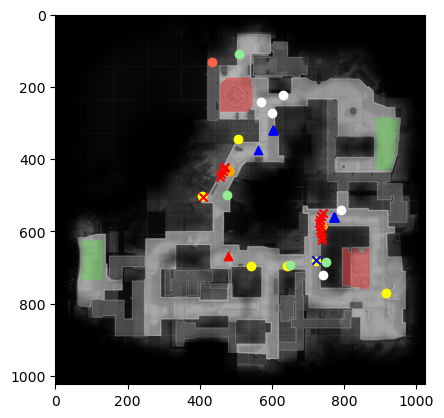

In [29]:
displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['vic_pos', 'att_pos', 'nade_land'], round=12)

In this round it is clear that the Ts (starting from the green spawn on the left) tried to advance towards the bombsites (the two translucent red boxes) but took multiple ticks of damage from the incediaries the CTs threw.

Now I wanna just look at the smokes from this round to see if I can tell who won this round.

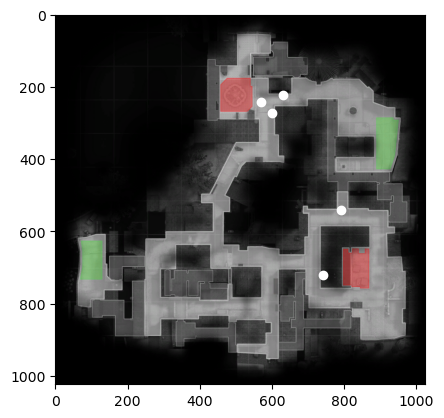

In [30]:
not_smoke = ["Decoy","Flash","Molotov","HE","Incendiary"]

displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['nade_land'], round=12, filterout=not_smoke)

Maybe not as exciting but still interesting. Unfortunetly, however, it would be more useful if i could tell which team through each smoke.

In [31]:
# creates new column "nade_team" which combines the side that threw the grenade and the type of grenade
df_gnade['nade_team'] = df_gnade['att_side'] + '_' + df_gnade['nade']

In [32]:
def displayGame(gameName, df, mapdata, gamesummary, round=0, show=[], filterout=[]):
    grenade_colors = {'Smoke': 'white',
                  'HE': 'lightgreen',
                  'Molotov': 'tomato',
                  'Flash': 'yellow',
                  'Incendiary': 'orange',
                  'Decoy': 'pink'}
    team_colors = {'Terrorist': 'red',
                   'CounterTerrorist': 'blue'}
    # filtering out data related to just this match
    gamedata = df[df['file'] == gameName]
    # data can be displayed for the entire match or a particular round
    if round > 0:
        gamedata = gamedata[gamedata['round'] == round]
    # get the map info for the map used in the match
    mapname = gamesummary[gamesummary['file'] == gameName]['map'].iloc[0]
    # plots the map
    im = plt.imread("csgodata/" + mapname + ".png")
    implot = plt.imshow(im)

    # place information in dataframes based on if you want to show 
    # a combination of attackers, victims, and/or grenades.
    nade_df = pd.DataFrame()
    att_df = pd.DataFrame()
    vic_df = pd.DataFrame()
    for l in show:
        # here the other functions are used to get grenade types and their pixel positions
        if l == 'nade_land':
            gamedata = gamedata[~gamedata['nade'].isin(filterout)] # only keep rows in the game that are not
                                                                   # in the filtered out list.
            nade_df = pos2px(gamedata.copy(), mapdata[mapdata['map'] == mapname], ['nade_land_x', 'nade_land_y'])
            nade_x_px = pos(nade_df, 'nade_land_x_px', 'nade_team')
            nade_y_px = pos(nade_df, 'nade_land_y_px', 'nade_team')
        # here the other functions are used to get attacker (CT or T) pixel positions
        elif l == 'att_pos':
            gamedata = gamedata[~gamedata['att_side'].isin(filterout)]
            att_df = pos2px(gamedata[gamedata['vic_side'].notna()].copy(), mapdata[mapdata['map'] == mapname], ['att_pos_x', 'att_pos_y'])
            att_x_px = pos(att_df, 'att_pos_x_px', 'att_side')
            att_y_px = pos(att_df, 'att_pos_y_px', 'att_side')
        # here the other functions are used to get victim (CT or T) pixel positions
        elif l == 'vic_pos':
            gamedata = gamedata[~gamedata['vic_side'].isin(filterout)]
            vic_df = pos2px(gamedata[gamedata['vic_side'].notna()].copy(), mapdata[mapdata['map'] == mapname], ['vic_pos_x', 'vic_pos_y'])
            vic_x_px = pos(vic_df, 'vic_pos_x_px', 'vic_side')
            vic_y_px = pos(vic_df, 'vic_pos_y_px', 'vic_side')
    # plots each type as a scatterplot on the image
    if not nade_df.empty:
        # assigns a square shape for CTs and Circle shape for Ts
        for g_t in nade_x_px.keys():
            if 'CounterTerrorist' in g_t:
                shape = 's'
            elif 'Terrorist' in g_t:
                shape = 'o'
            t = g_t.split('_')[1]
            plt.scatter(x=list(nade_x_px[g_t]), y=list(nade_y_px[g_t]), c=grenade_colors[t], marker=shape)
    if not att_df.empty:
        for t in att_x_px.keys():
            plt.scatter(x=list(att_x_px[t]), y=list(att_y_px[t]), c=team_colors[t], marker='^')
    if not vic_df.empty:
        for t in vic_x_px.keys():
            plt.scatter(x=list(vic_x_px[t]), y=list(vic_y_px[t]), c=team_colors[t], marker='x')
    plt.show()

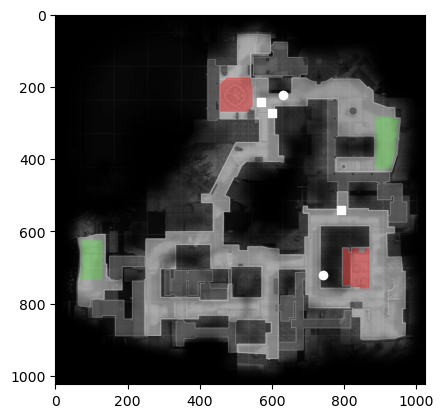

In [33]:
displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['nade_land'], round=12, filterout=not_smoke)

Alright, now I can tell that the Ts probably made a push for the top bombsite, as they threw a defensive somke (most likely after the CTs threw their smokes to try and stop the push). Or the CTs threw their smokes after retaking site to stop the remaining Ts from seeing them defuse the bomb.

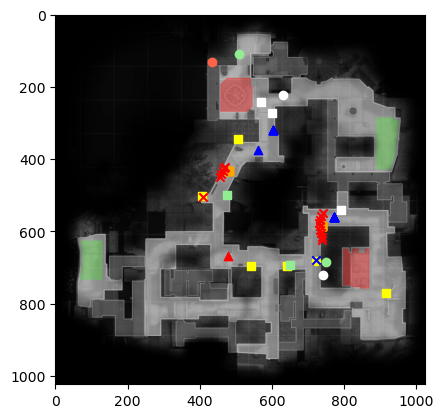

In [51]:
displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['vic_pos', 'att_pos', 'nade_land'], round=12)

Here we can see the same round again but with the improvements made and with all grenades displayed.

And Finally for fun we can see what the grenades over the entire match look like. I have opted to remove the attackers (red x's and trianges)and victims (blue x's and triangles) to better see the grenades.

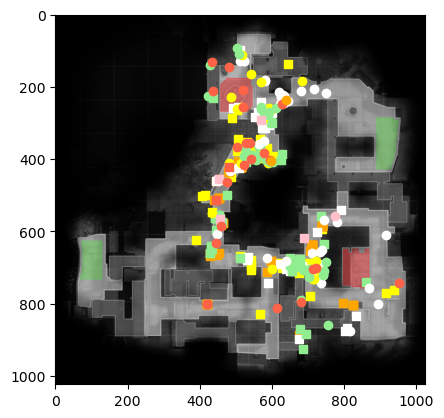

In [36]:
displayGame(games[2], df_gnade, df_mapdata, df_metadata, show=['nade_land'])